# UNIDAD 1: Introducción a la programación y bases de datos.

## Primero algunas definiciones

**¿Qué es una base de datos?**  

"Una base de datos es una herramienta para recopilar y organizar información. Las bases de datos pueden almacenar información sobre personas, productos, pedidos u otras cosas. Muchas bases de datos comienzan como una lista en una hoja de cálculo o en un programa de procesamiento de texto. A medida que la lista aumenta su tamaño, empiezan a aparecer redundancias e inconsistencias en los datos. Cada vez es más difícil comprender los datos en forma de lista y los métodos de búsqueda o extracción de subconjuntos de datos para revisión son limitados. Una vez que estos problemas comienzan a aparecer, una buena idea es transferir los datos a una base de datos creada con un sistema de administración de bases de datos (DBMS), como Access, MySQL, SQL Server, MariaDB."  

Tomado de: https://support.microsoft.com/es-es/office/conceptos-b%C3%A1sicos-sobre-bases-de-datos-a849ac16-07c7-4a31-9948-3c8c94a7c204#__toc257378454


![Alt text](ciclo-datos.png)

**¿Qué es programar?**  

La programación, o codificación, es el proceso de emitir una serie de órdenes que un ordenador puede entender y ejecutar para realizar una tarea. Hoy en día, casi todas las investigaciones con algún aspecto cuantitativo implican programación.

Imaginemos que un ordenador es como un genio especialmente travieso: si nuestras instrucciones no son totalmente inequívocas, el ordenador no hará lo que le pedimos. Por eso escribimos nuestro código, nuestra lista de instrucciones para el ordenador, de forma muy explícita, para asegurarnos de que escribimos lo que queríamos decir y de que el ordenador lo hará de la forma prevista. Pero, al igual que un genio, si consigues que las instrucciones sean las correctas, puedes crear cosas mágicas *(Turrell, 2022)*.

## 1.1. Introducción a los datos y su importancia

En los últimos años, la ciencia de los datos se ha convertido en una herramienta de negocios esencial. El acceso a cantidades masivas de datos —gracias a la informática avanzada y la «internet de las cosas»— permite que hoy en día las empresas puedan medir todos los aspectos de sus operaciones hasta el más mínimo detalle. Pero muchos directores de empresa, desbordados por el continuo aluvión de indicadores, vacilan en implicarse en un proceso que consideran de índole técnica.

A quién le cabe en la cabeza que un director de finanzas vaya al director ejecutivo y le diga:
- Yo francamente no sé cómo leer un balance, pero tengo a alguien en mi equipo que lo sabe hacer muy bien.
Lo echaríamos de la sala a carcajadas.

Y sin embargo, yo conozco cantidad de gente en otras disciplinas, como por ejemplo, el marketing, que, sin pensarlo dos veces, irían al director ejecutivo y le dirían:
- "Esto de la analítica es muy complicado. No lo entiendo del todo. Pero he reunido un equipo de auténticos genios de la analítica que nos van a propulsar al siguiente nivel".

Yo creo que ésta es una respuesta que ya no es aceptable.

Tomado de: https://insight.kellogg.northwestern.edu/es/article/a-leaders-guide-to-data-analytics

In [1]:
import pandas as pd
import numpy as np
import requests

import win32com.client as win32
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

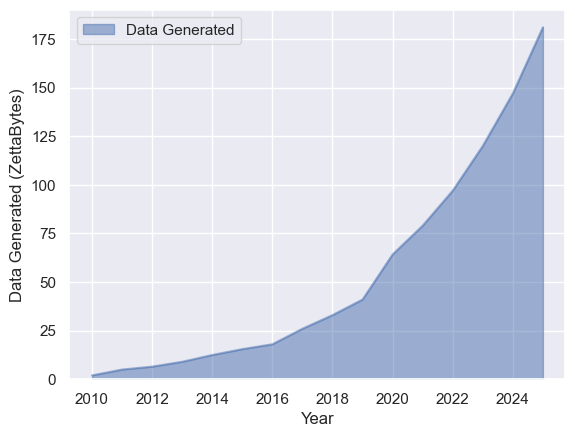

In [2]:
url = requests.get('https://explodingtopics.com/blog/data-generated-per-day')
df  = pd.read_html(url.text)[1][[0,1]]
df.columns = df.iloc[0]
df = df.iloc[1:]
df['Year'] = df['Year'].str[0:4].astype(int)
df['Data Generated'] = df['Data Generated'].str.split(' ', expand=True)[0].astype(float)
df.set_index('Year', inplace=True, drop=True)

df.plot.area(alpha=0.5)
plt.ylabel('Data Generated (ZettaBytes)')
plt.legend(title='')
plt.savefig('./images/data_generated.png', dpi=300)
plt.show()

In [3]:
mail = win32.Dispatch('outlook.application').CreateItem(0)
mail.Bcc = open('listado.txt').read().replace('\n', '; ')
mail.Subject = f'Cantidad de datos generados por año'
mail.HTMLBody = fr'''
<html>
  <head></head>
    <body>
        Hola alumnos, <br>
        <p>Les comparto la cantidad de datos generados por año</p>
        <br>
        {df.to_html()}
        <br>
        <img src="C:\Users\Alejo\OneDrive - Universidad de Las Américas\UDLA\pmdb\pmdb-material\images\data_generated.png">
        <br>
        Fuente: <a href="https://explodingtopics.com/blog/data-generated-per-day">Exploding Topics</a>
        <br>
        <p>Saludos,</p>
        <p>Alejo</p>
    </body>
</html>
'''
if False: mail.Send()

df


## 1.2. Elementos de una base de datos

## 1.3. Introducción al lenguaje de consultas SQL

## 1.4. Sintaxis básica de SQL para consultas